In [1]:
from veldis.veldis import Veldis
from specim.specfuncs import spec1d

import matplotlib.pyplot as plt
import numpy as np

In [2]:
spec1 = spec1d.Spec1d('../spectra_extraction/extracted_spec/'\
              'spec1d_J0040+2555_LRISr_2020Nov21T045325.037_modelfit_three_moffat.fits', informat='fits')

spec2 = spec1d.Spec1d('../spectra_extraction/extracted_spec/'\
                      'spec1d_0031_J0040_LRISr_2020Nov21_modelfit_three_moffat.fits', informat='fits')


Reading spectrum from ../spectra_extraction/extracted_spec/spec1d_J0040+2555_LRISr_2020Nov21T045325.037_modelfit_three_moffat.fits
Expected file format: fits
 Spectrum Start:  5648.34
 Spectrum End:     8924.34
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Reading spectrum from ../spectra_extraction/extracted_spec/spec1d_0031_J0040_LRISr_2020Nov21_modelfit_three_moffat.fits
Expected file format: fits
 Spectrum Start:  5648.80
 Spectrum End:     8924.80
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [3]:
sp_add = spec1.__add__(spec2)

 Spectrum Start:  5648.34
 Spectrum End:     8924.34
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [4]:
spec = Veldis(wav=sp_add['wav'], flux=sp_add['flux'], var=sp_add['var'])

 Spectrum Start:  5648.34
 Spectrum End:     8924.34
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



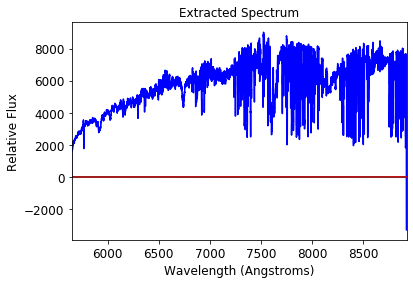

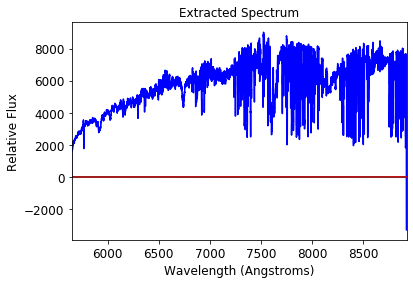

In [5]:
spec.plot()

In [6]:
spec['var'] = np.full(len(spec['var']), 0.0003)
spec.var = spec['var']

In [7]:
response1d = spec1d.Spec1d('../other_spectra/response_curve_from_feige110_r11202020.txt')


Reading spectrum from ../other_spectra/response_curve_from_feige110_r11202020.txt
Expected file format: text
 Spectrum Start:  5645.15
 Spectrum End:     8920.92
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



In [8]:
response1d.resample(owave=spec['wav'])

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


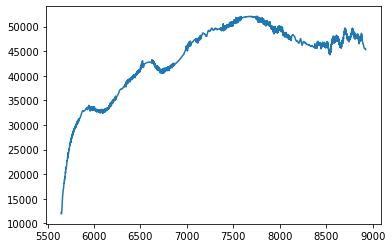

In [9]:
plt.figure()
plt.plot(response1d.rswav, response1d.rsflux)

In [10]:
spec.resp_corr(response1d.rsflux, action='divide')

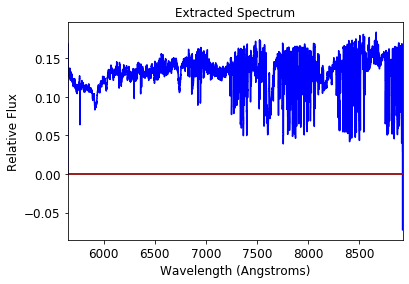

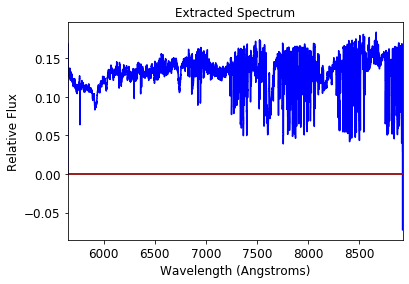

In [11]:
spec.plot()


spectra has been trimmed, now...

wav_min : 5648.336669

wav_max : 8894.738649
 Spectrum Start:  5648.34
 Spectrum End:     8894.74
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80





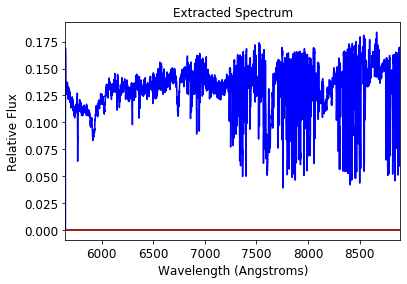

In [12]:
spec.trimspec(wavrange=[5640, 8895])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I (b)      5176.00       5921.34
Na I (D)      5889.95       6738.10
Na I (D)      5895.92       6744.93
H-alpha       6562.80       7507.84


Line        lambda_rest  lambda_obs
----------  -----------  -----------
[O III]       4962.00       5676.53
[O III]       5007.00       5728.01
[N I]         5199.00       5947.66
HeI           5876.00       6722.14
[O I]         6300.00       7207.20
[N II]        6548.00       7490.91
H-alpha       6562.80       7507.84
[N II]        6583.50       7531.52
[S II]        6716.40       7683.56
[S II]        6730.80       7700.04



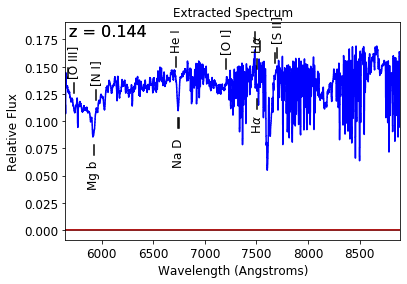

In [13]:
spec.trim_spec.smooth(7)
spec.trim_spec.mark_lines('abs', z=0.144, usesmooth=True)
spec.trim_spec.mark_lines('em', z=0.144, usesmooth=True)

In [14]:
mask_reg = [(8.6588, 8.6616), (8.8265, 8.8571), (8.9290, 8.9557), (9.0507, 9.0835)]

<IPython.core.display.Javascript object>


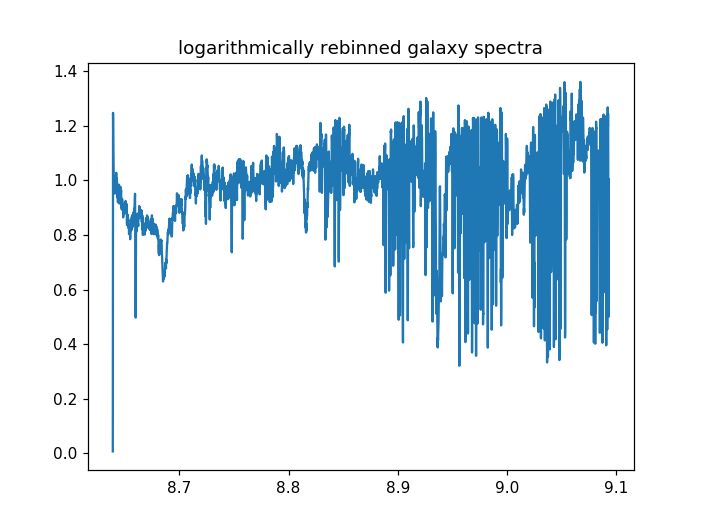

<IPython.core.display.Javascript object>


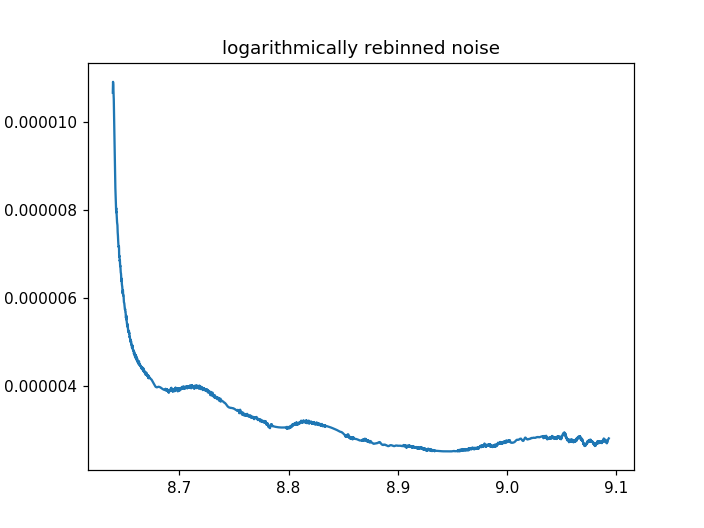

In [15]:
%matplotlib notebook
spec.cal_parm(z=0.144)

vsyst = -146493.127213 

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value


<IPython.core.display.Javascript object>


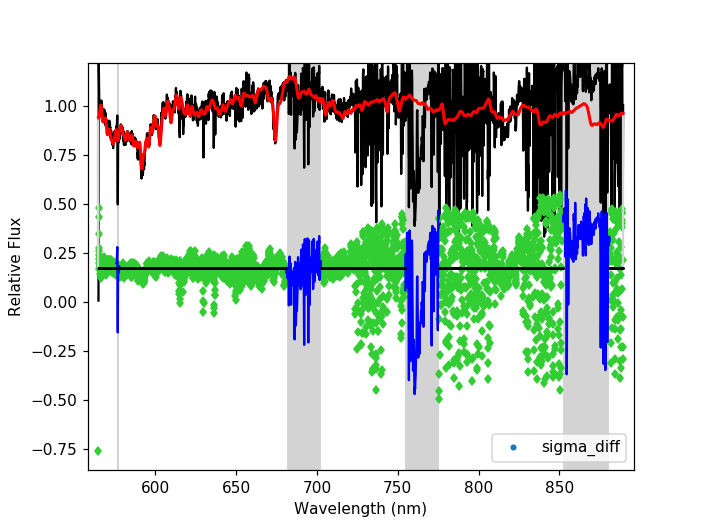


degree : 4
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40438       268    -0.029     0.038
chi2/DOF: 2.337e+09; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 850


<IPython.core.display.Javascript object>


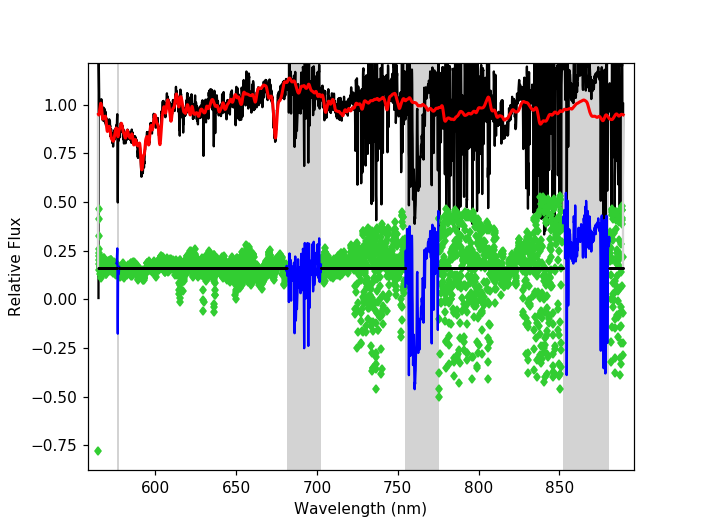


degree : 5
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40415       286    -0.050     0.033
chi2/DOF: 2.334e+09; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 850


<IPython.core.display.Javascript object>


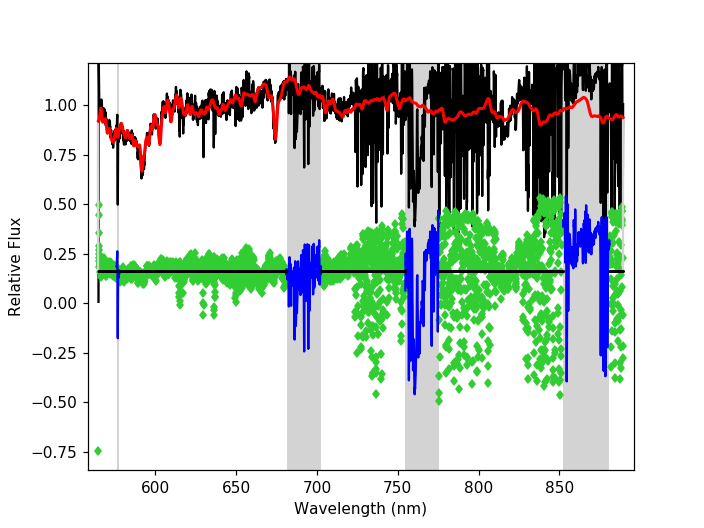


degree : 6
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40416       301    -0.053     0.045
chi2/DOF: 2.332e+09; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 850


<IPython.core.display.Javascript object>


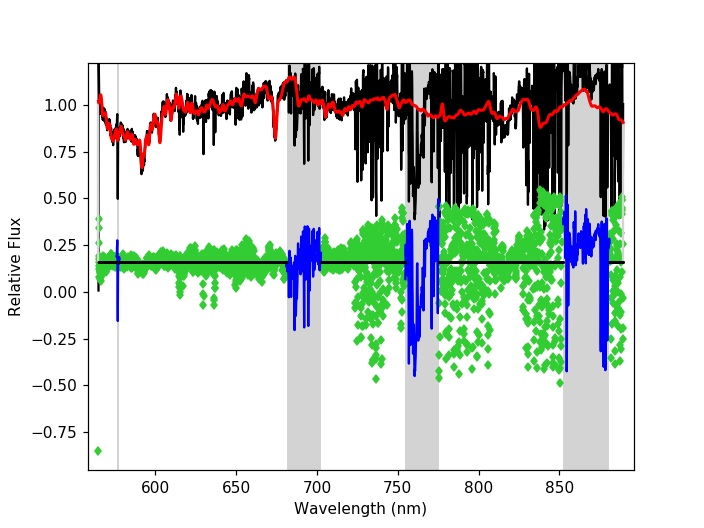


degree : 7
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40421       251    -0.059     0.043
chi2/DOF: 2.321e+09; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 17; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 850


<IPython.core.display.Javascript object>


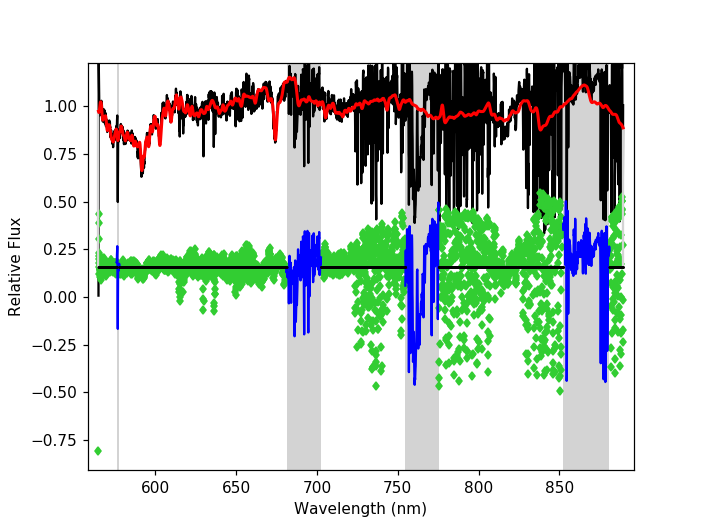


degree : 8
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40423       257    -0.051     0.042
chi2/DOF: 2.319e+09; degree = 8; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 12; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 850


<IPython.core.display.Javascript object>


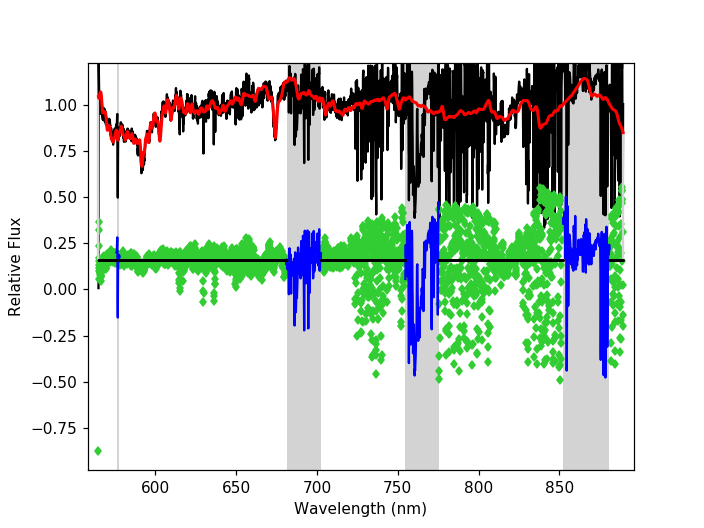


degree : 9
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40420       262    -0.061     0.059
chi2/DOF: 2.314e+09; degree = 9; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 12; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 850


<IPython.core.display.Javascript object>


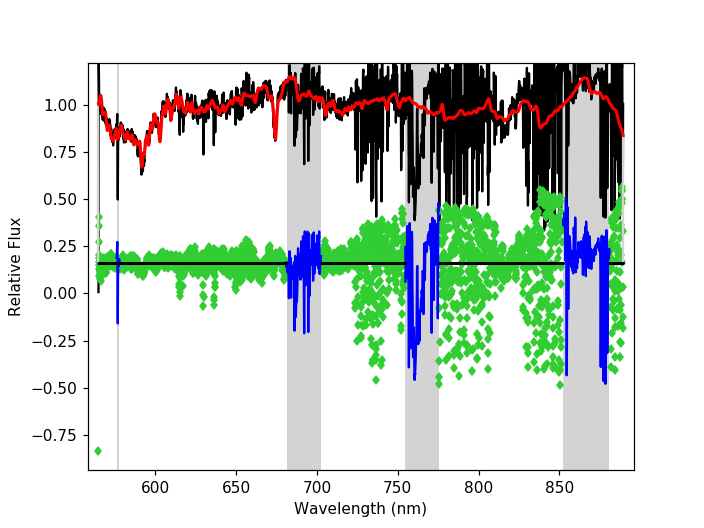


degree : 10
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40424       253    -0.064     0.062
chi2/DOF: 2.313e+09; degree = 10; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 12; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 850


<IPython.core.display.Javascript object>


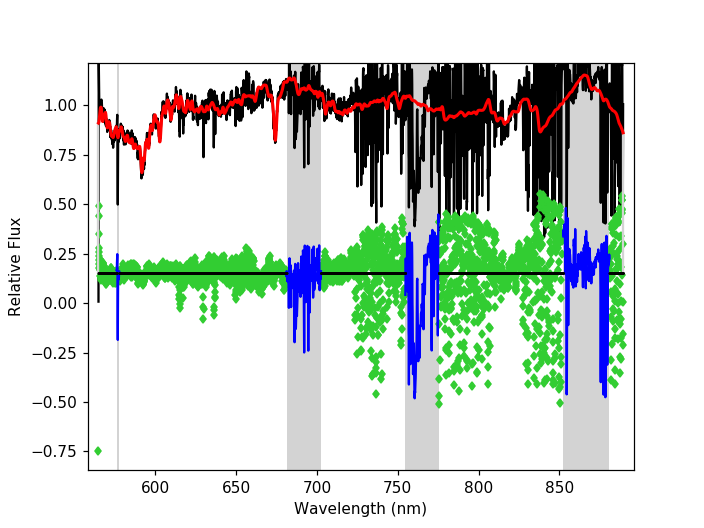


degree : 11
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40413       244    -0.102     0.078
chi2/DOF: 2.305e+09; degree = 11; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 850


<IPython.core.display.Javascript object>


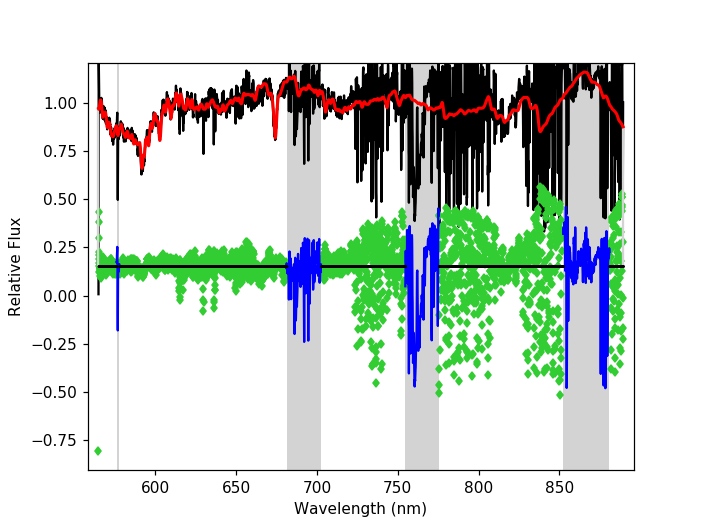


degree : 12
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40411       255    -0.104     0.066
chi2/DOF: 2.303e+09; degree = 12; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 12; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 850


<IPython.core.display.Javascript object>


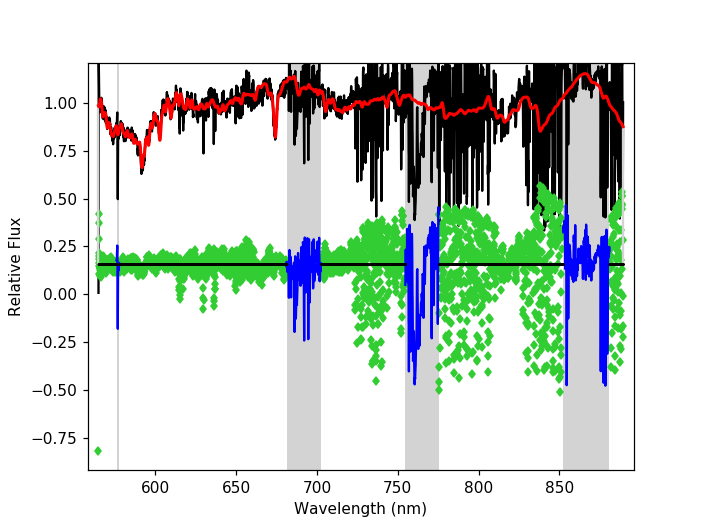


degree : 13
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40411       262    -0.102     0.052
chi2/DOF: 2.303e+09; degree = 13; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 12; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 850


<IPython.core.display.Javascript object>


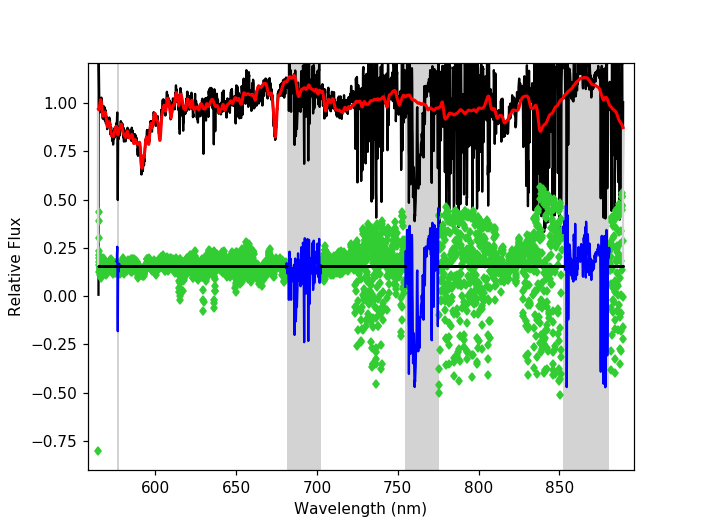


degree : 14
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40409       277    -0.093     0.025
chi2/DOF: 2.303e+09; degree = 14; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 850


<IPython.core.display.Javascript object>


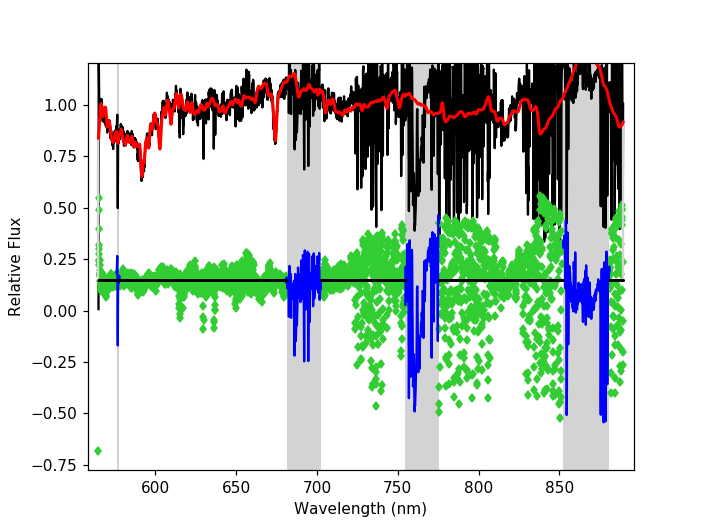


degree : 15
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40413       265    -0.085     0.060
chi2/DOF: 2.297e+09; degree = 15; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 850


<IPython.core.display.Javascript object>


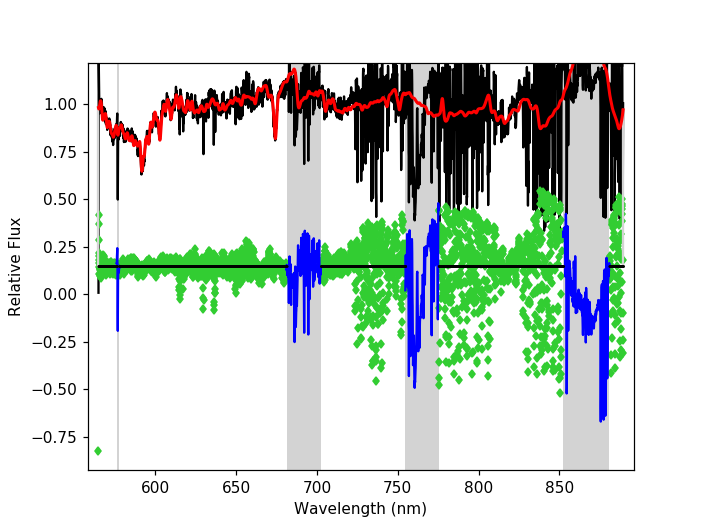


degree : 16
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40420       259    -0.061     0.041
chi2/DOF: 2.291e+09; degree = 16; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 850


<IPython.core.display.Javascript object>


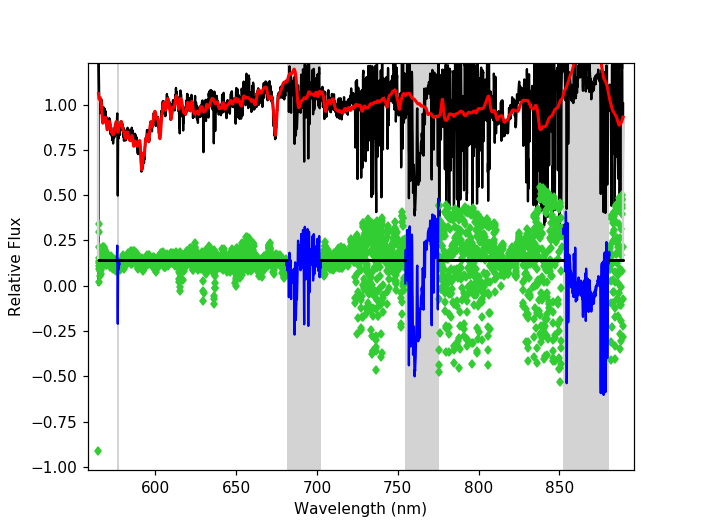


degree : 17
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40420       249    -0.058     0.064
chi2/DOF: 2.287e+09; degree = 17; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 22; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 850


<IPython.core.display.Javascript object>


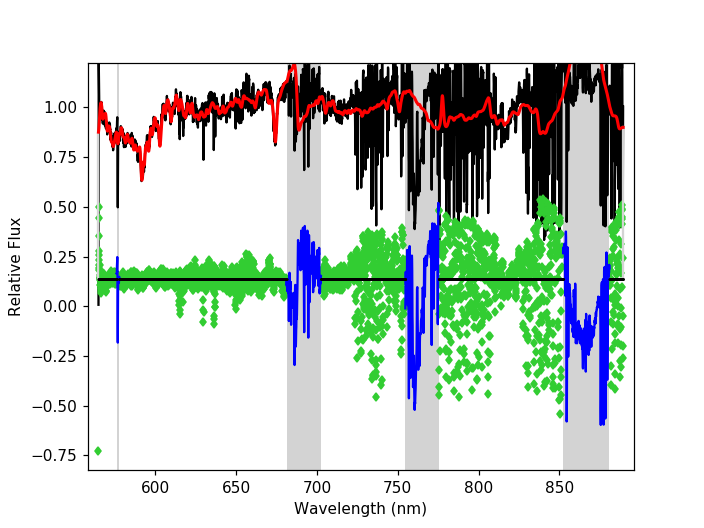


degree : 18
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40423       249    -0.072     0.076
chi2/DOF: 2.275e+09; degree = 18; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 850


<IPython.core.display.Javascript object>


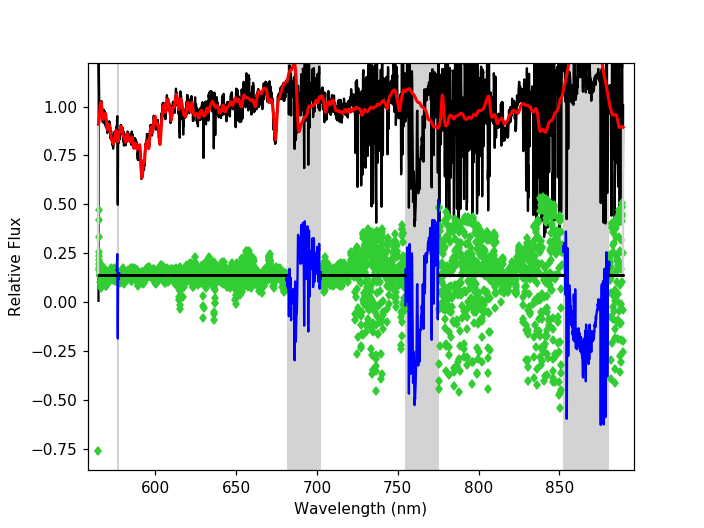


degree : 19
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40424       261    -0.069     0.050
chi2/DOF: 2.275e+09; degree = 19; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 22; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 850


<IPython.core.display.Javascript object>


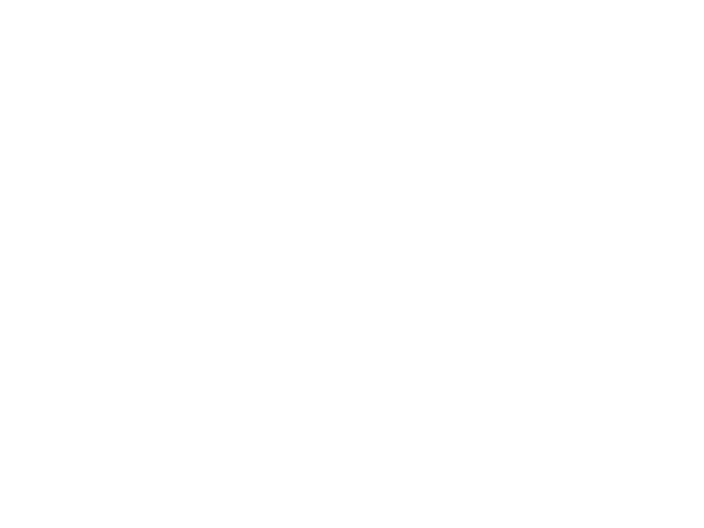

In [16]:
spec.cal_veldis(lib_path='../TEXT/*', temp_num=850, sig_ins=1.65, mask_reg=mask_reg, degree=[4,20],
               show_weight=True)

<IPython.core.display.Javascript object>


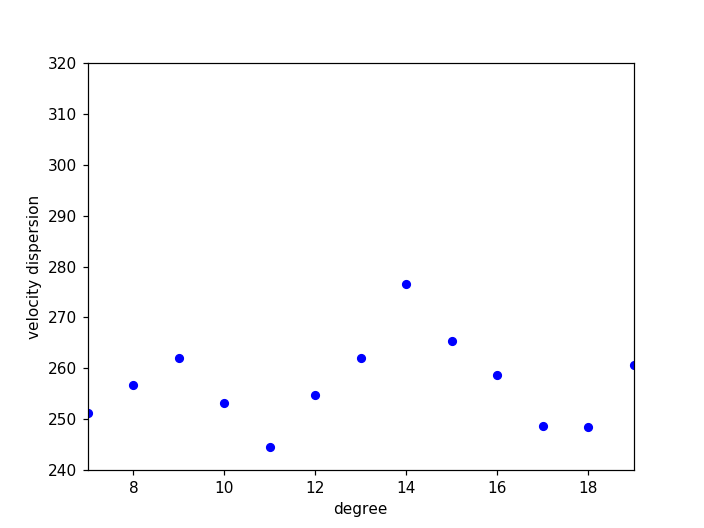

In [21]:
spec.plot_veldis(xlim=[7,19], ylim=[240,320])

In [22]:
spec_new = Veldis(wav=sp_add['wav'], flux=sp_add['flux'], var=sp_add['var'])

 Spectrum Start:  5648.34
 Spectrum End:     8924.34
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [23]:
spec_new['var'] = np.full(len(spec_new['var']), 0.0003)
spec_new.var = spec_new['var'] 

In [24]:
spec_new.resp_corr(response1d.rsflux, action='divide')

/home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs/spec1d.py:1013: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = plt.figure()


<IPython.core.display.Javascript object>


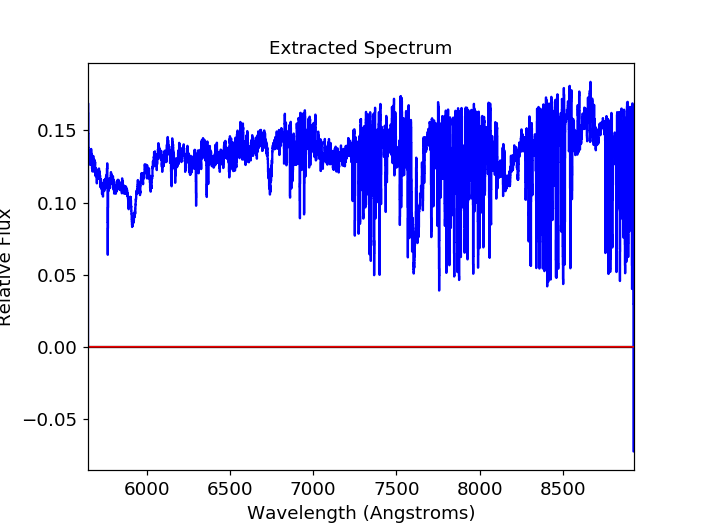

<IPython.core.display.Javascript object>


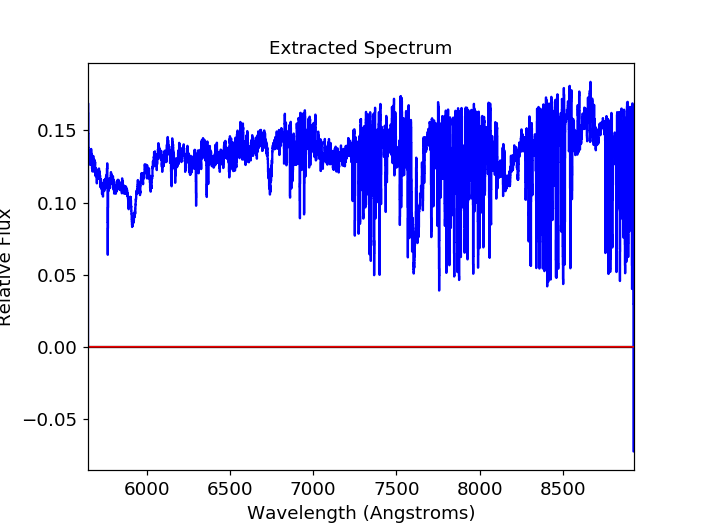

In [25]:
spec_new.plot()


spectra has been trimmed, now...

wav_min : 5821.793983

wav_max : 6235.382224
 Spectrum Start:  5821.79
 Spectrum End:     6235.38
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80





<IPython.core.display.Javascript object>


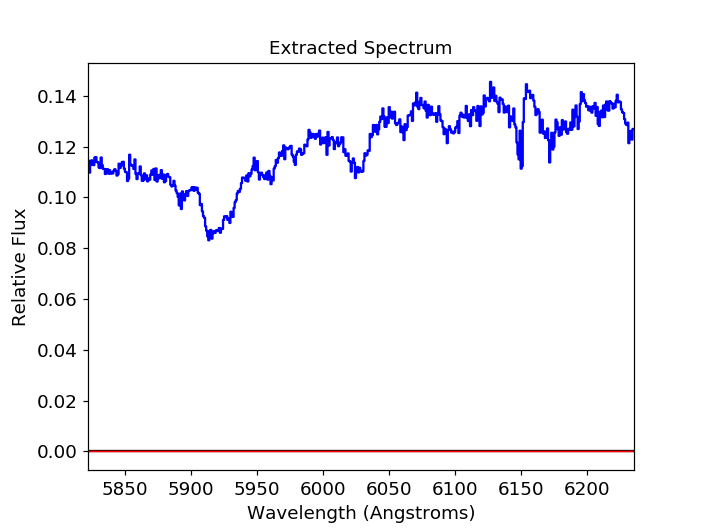

In [26]:
spec_new.trimspec(wavrange=[5822, 6235])

/home/pritom/anaconda3/lib/python3.7/site-packages/veldis-0.1-py3.7.egg/veldis/veldis.py:177: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


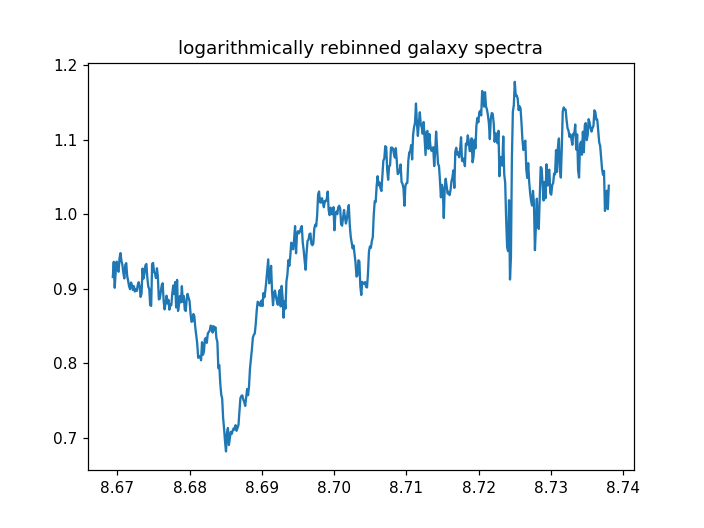

/home/pritom/anaconda3/lib/python3.7/site-packages/veldis-0.1-py3.7.egg/veldis/veldis.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


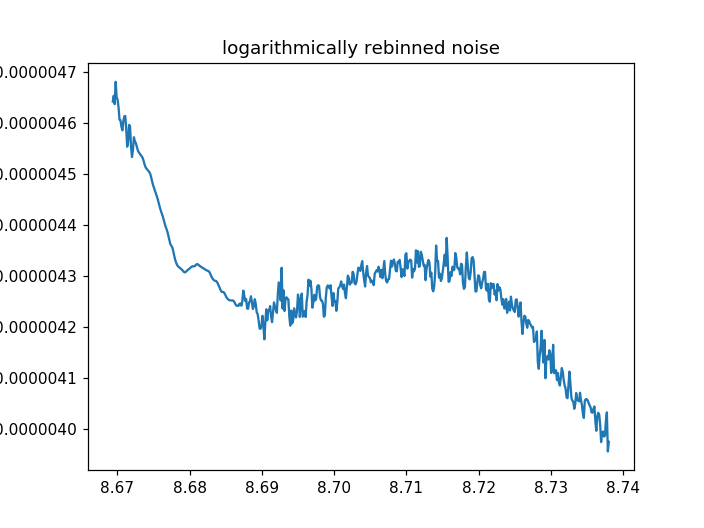

In [28]:
spec_new.cal_parm(z=0.144)

vsyst = -155561.055133 

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value


<IPython.core.display.Javascript object>


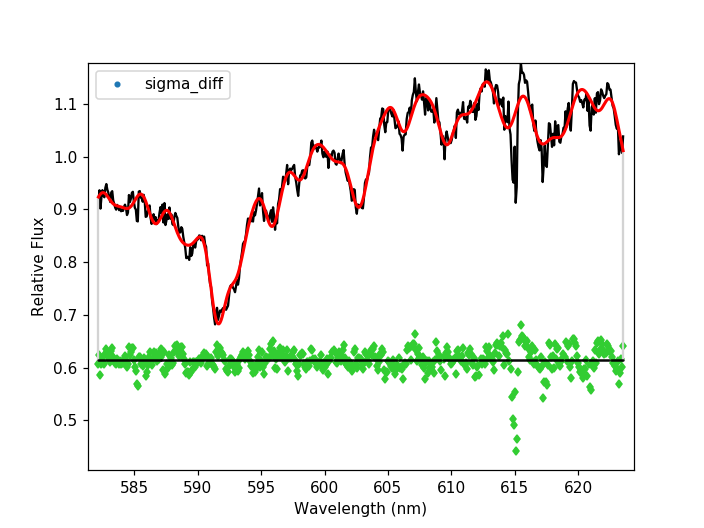


degree : 2
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40415       384    -0.007     0.114
chi2/DOF: 2.749e+07; degree = 2; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 850


/home/pritom/anaconda3/lib/python3.7/site-packages/veldis-0.1-py3.7.egg/veldis/veldis.py:520: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


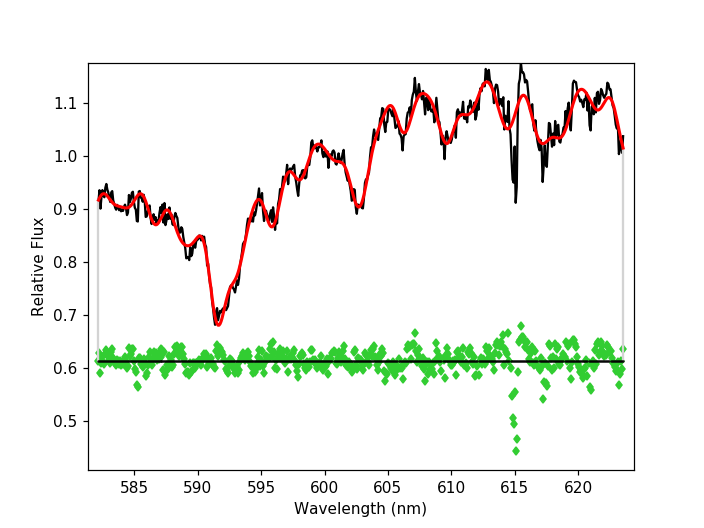


degree : 3
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40407       397    -0.017     0.125
chi2/DOF: 2.731e+07; degree = 3; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 850


<IPython.core.display.Javascript object>


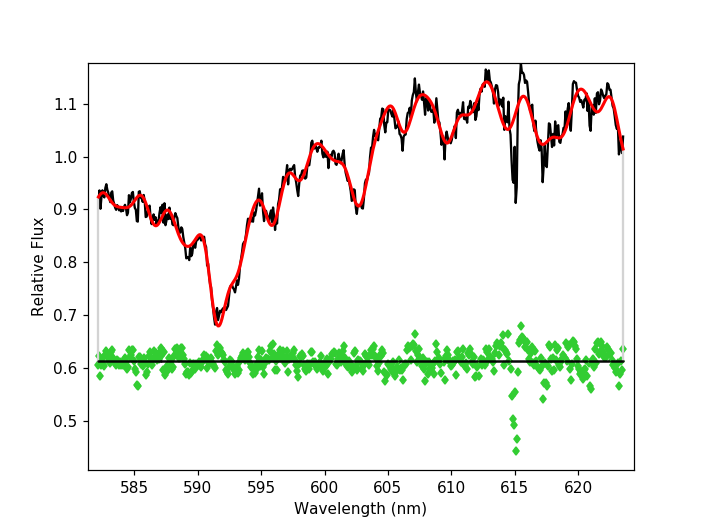


degree : 4
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40425       408     0.015     0.137
chi2/DOF: 2.716e+07; degree = 4; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  25 / 850


<IPython.core.display.Javascript object>


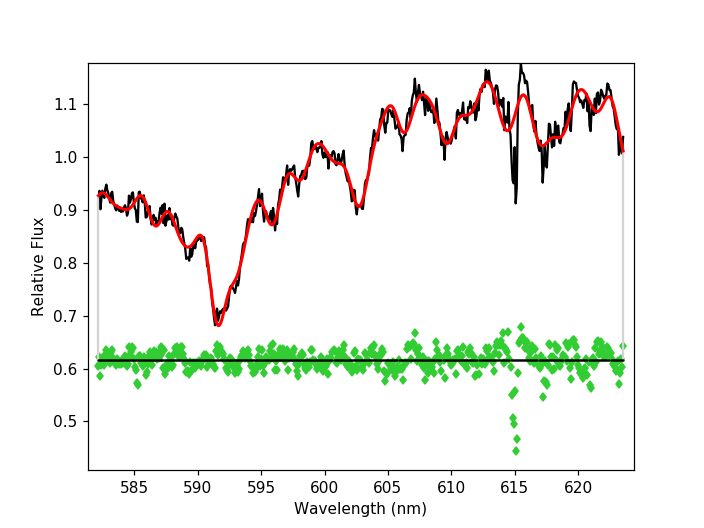


degree : 5
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40405       412    -0.020     0.131
chi2/DOF: 2.704e+07; degree = 5; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  25 / 850


<IPython.core.display.Javascript object>


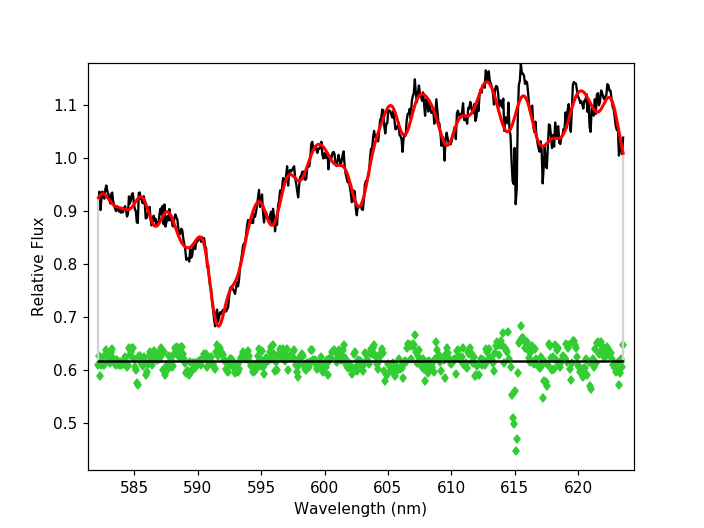


degree : 6
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40400       400    -0.030     0.127
chi2/DOF: 2.694e+07; degree = 6; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 850


<IPython.core.display.Javascript object>


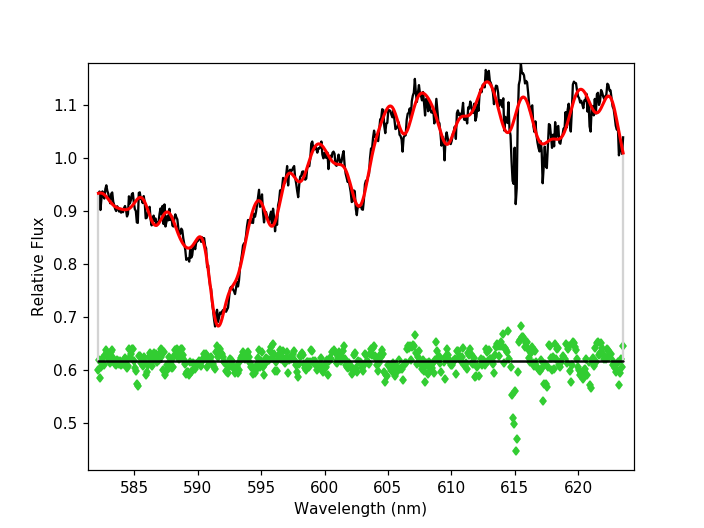


degree : 7
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40403       413    -0.013     0.137
chi2/DOF: 2.681e+07; degree = 7; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 850


<IPython.core.display.Javascript object>


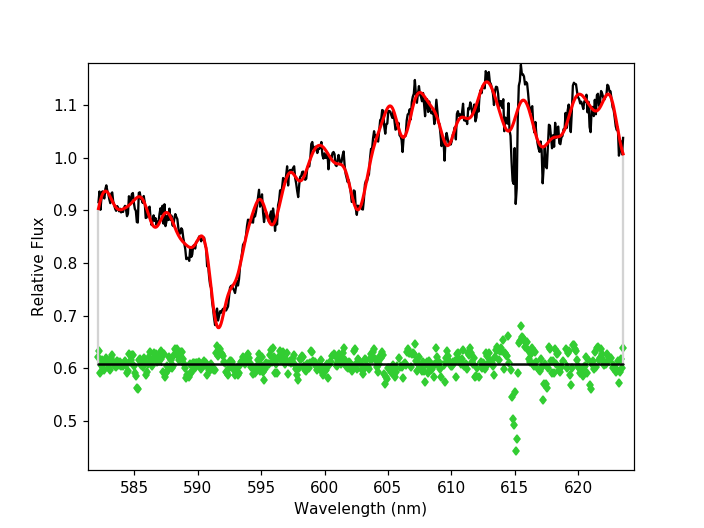


degree : 8
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40381       366    -0.058     0.135
chi2/DOF: 2.498e+07; degree = 8; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 850


<IPython.core.display.Javascript object>


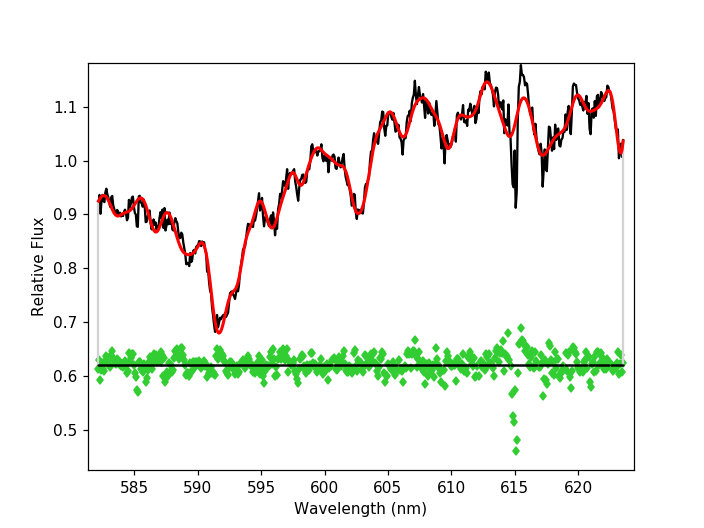


degree : 9
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40457       264     0.043     0.076
chi2/DOF: 2.271e+07; degree = 9; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 850


<IPython.core.display.Javascript object>


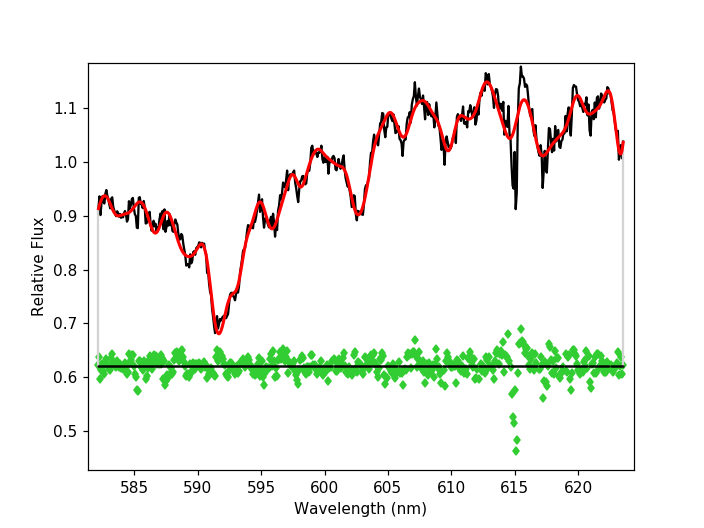

719, 18.998498

degree : 10
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40466       279     0.067     0.080
chi2/DOF: 2.241e+07; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 850


<IPython.core.display.Javascript object>


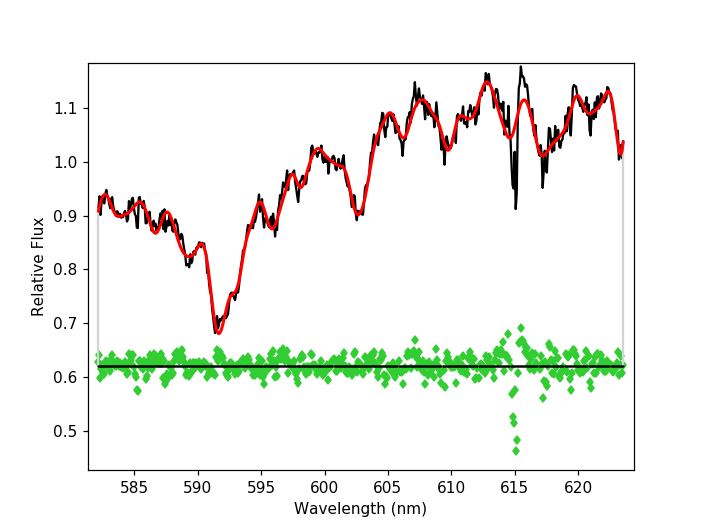

719, 23.641037

degree : 11
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40460       272     0.054     0.075
chi2/DOF: 2.240e+07; degree = 11; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 850


<IPython.core.display.Javascript object>


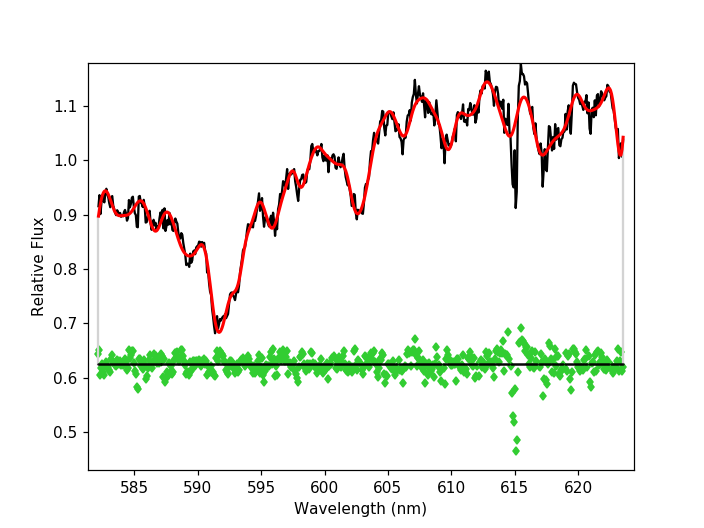

719, 21.058569

degree : 12
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40459       259     0.028     0.073
chi2/DOF: 2.222e+07; degree = 12; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 850


<IPython.core.display.Javascript object>


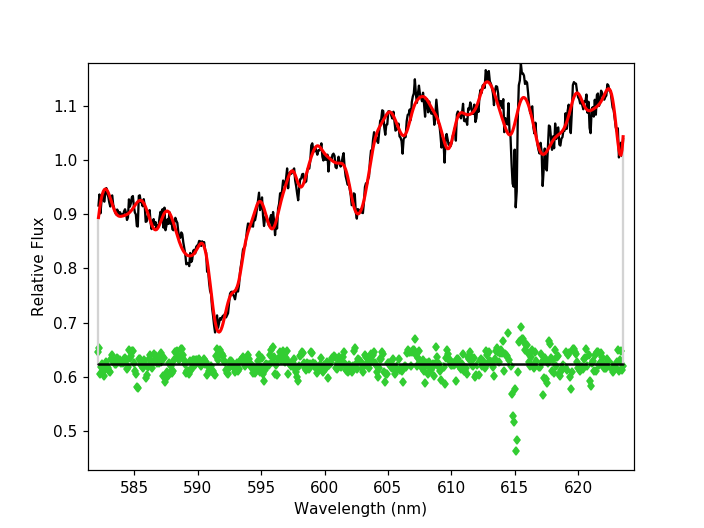

719, 24.875102

degree : 13
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40442       242     0.006     0.048
chi2/DOF: 2.222e+07; degree = 13; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 850


<IPython.core.display.Javascript object>


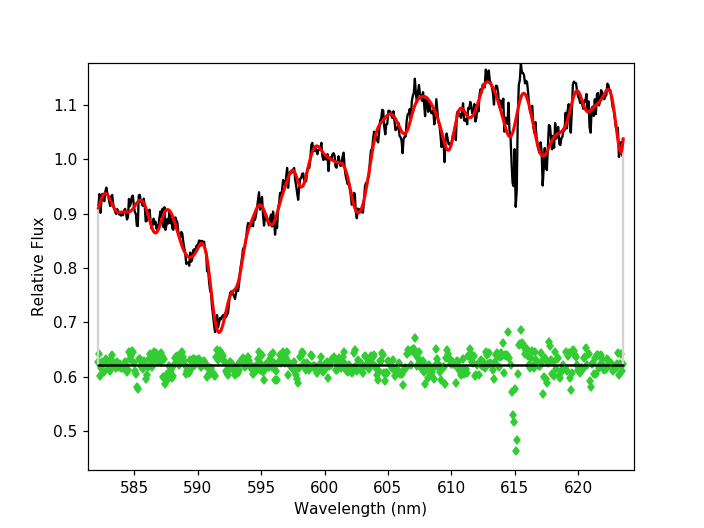

719, 25.721793

degree : 14
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40460       226     0.006     0.011
chi2/DOF: 2.157e+07; degree = 14; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  23 / 850


<IPython.core.display.Javascript object>


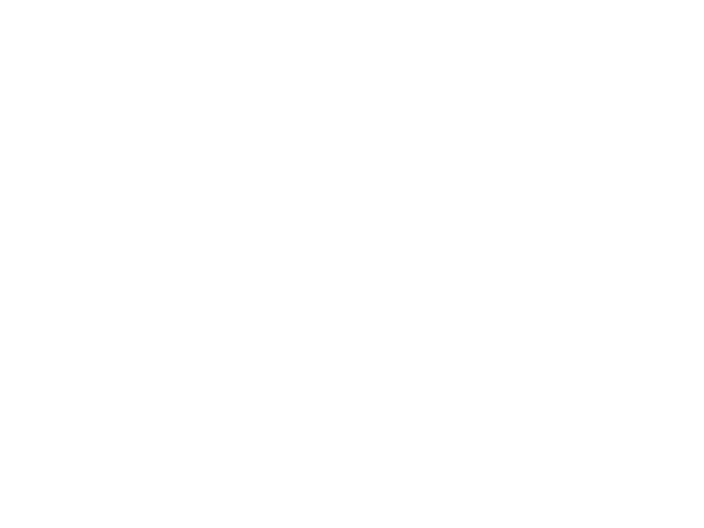

719, 33.318370


In [29]:
spec_new.cal_veldis(lib_path='../TEXT/*', temp_num=850, sig_ins=1.65,
                    degree=[2, 15], 
                    show_weight=True) #mask_reg=[(8.7238, 8.7252)],

/home/pritom/anaconda3/lib/python3.7/site-packages/veldis-0.1-py3.7.egg/veldis/veldis.py:536: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


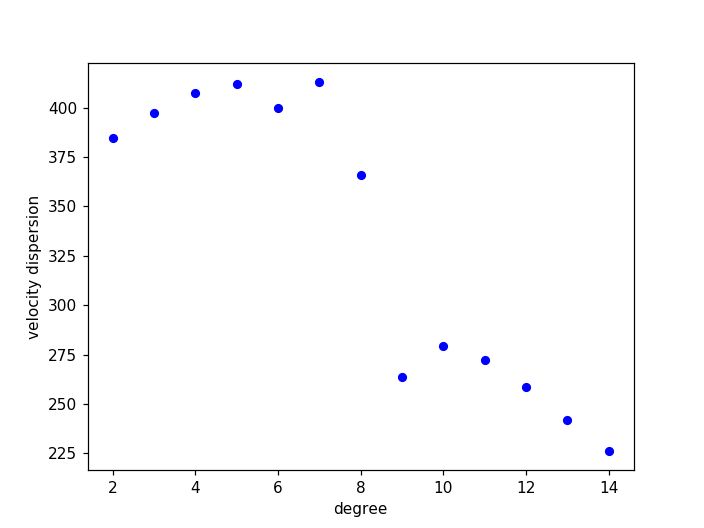

In [30]:
spec_new.plot_veldis(xlim=[8, 15], ylim)